In [1]:
import shap
import joblib
import sys,os,time,platform

if platform.node() == 'aizat-fyp':
    sys.path.append(r'/home/aizat/ember')
    sys.path.append(r'/home/aizat/OneDrive/Master Project/Workspace/boosting-ember')
    datasetpath = '/home/aizat/OneDrive/Master Project/Workspace/dataset/ember2018'
else:
    sys.path.append(r'/root/ember')
    sys.path.append(r'/root/boosting-ember')
    datasetpath = '/root/dataset/ember2018/'
    
import ember
import pandas as pd
import numpy as np
import lightgbm as lgb
import boostember
from boostember.features_extended import *
boostember.mlflowsetup('https://raw.githubusercontent.com/aizatrosli/boosting-ember/main/mlflow?token=ACRLNIPCA745DENP3KF3XEDAQ7TKE')


True

In [2]:
X_train, y_train, X_test, y_test = ember.read_vectorized_features(datasetpath)
delunlabel = (y_train != -1)

X_train = X_train[delunlabel]
#X_train = pd.DataFrame(X_train, columns=emberfeaturesheader())
y_train = y_train[delunlabel]
X_train.shape, y_train.shape

((600000, 2381), (600000,))

In [ ]:
model = joblib.load('./model/defaultparams_11_4.pkl')

In [ ]:
model.params.update({'num_threads':22, 'device_type':'gpu'})

In [ ]:

# shap will call the GPU accelerated version as long as the predictor parameter is set to "gpu_predictor"
#model.set_param({"predictor": "gpu_predictor"})
explainer = shap.TreeExplainer(model)
%time shap_values = explainer.shap_values(X_train, nsamples=1000)

# visualize the first prediction's explanation


In [ ]:
shap.force_plot(
    explainer.expected_value[0],
    shap_values[0][0, :],
    X_train[0, :],
    feature_names=emberfeaturesheader(),
    matplotlib=True
)


In [ ]:
joblib.dump(explainer,'shap_sample1000_normaldata_defaultparams_11_4.pkl')

In [ ]:
joblib.dump(shap_values,'result_sample1000_normaldata_defaultparams_11_4.pkl')

In [6]:

explainer = joblib.load('shap_normaldata_defaultparams_11_4.pkl')
shap_values = joblib.load('result_normaldata_defaultparams_11_4.pkl')


In [ ]:
shap.force_plot(
    explainer.expected_value[0],
    shap_values[0])

In [ ]:
shap_values[0][0], shap_values[0][1]

In [4]:
explainer0 = explainer.expected_value[0]
shap_values0 = shap_values[0]
del explainer
del shap_values

In [ ]:
shap.force_plot(
    explainer0,
    shap_values0[0, :],
    X_train[0, :],
    feature_names=emberfeaturesheader(),
    matplotlib=True
)


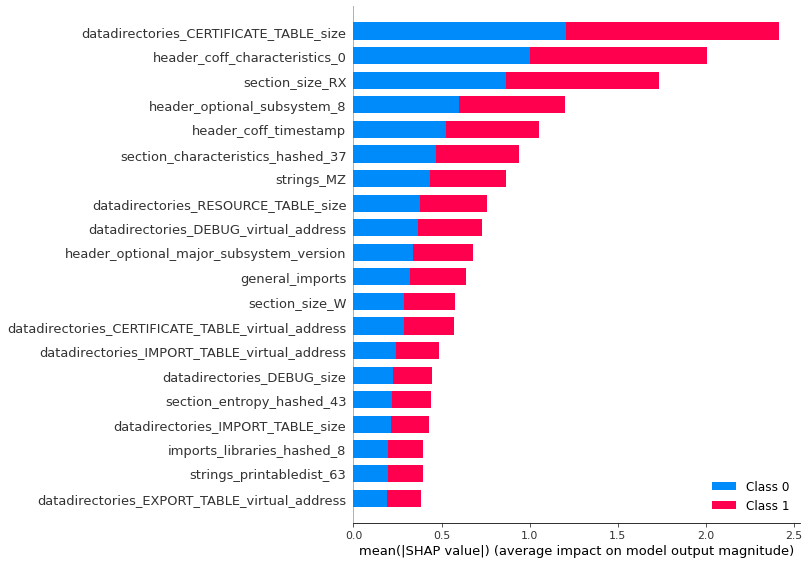

In [7]:
shap.summary_plot(
    shap_values,
    feature_names=emberfeaturesheader()
)